In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [7]:
fstLyr = np.array([
    [82.7331, 81.8326, 81.8326], #SC
    [98.9778, 98.9927, 98.9927], #OR_car
    [98.5585, 98.5685, 98.5685], #OR_person
    [94.964, 94.964, 94.964], #OR_horse
    [78.5007, 77.9349, 77.9349]  #OR_cow
])

secLyr = np.array([
    [82.6801, 81.8856, 81.8856], #SC
    [98.5696, 98.4723, 98.4723], #OR_car
    [98.3263, 98.2802, 98.2802], #OR_person
    [94.4844, 94.6709, 94.6709], #OR_horse
    [77.3692, 75.5304, 75.5304]  #OR_cow
])

titles = [r'SC',r'OR$_{car}$', r'OR$_{person}$',r'OR$_{horse}$',r'OR$_{cow}$']

x = [ i for i in range(1,len(secLyr[0])+1)]

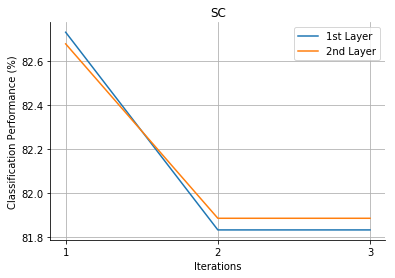

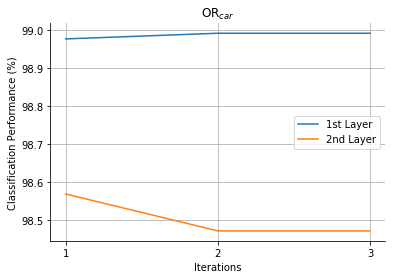

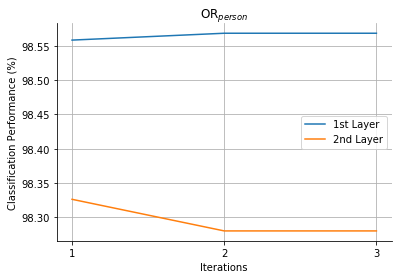

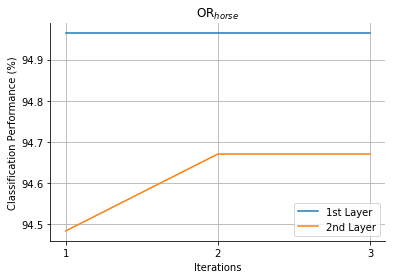

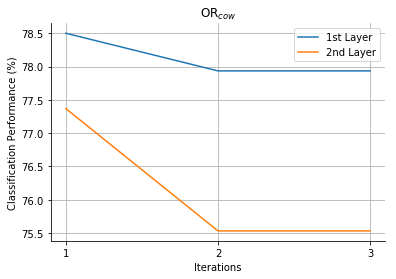

In [9]:
for i in range(0,len(fstLyr)):
    
    conc = np.append(fstLyr[i], secLyr[i])
    min_val_y = np.amin(conc) - 2
    
    plt.figure()
    plt.plot(x, fstLyr[i], label = '1st Layer')
    plt.plot(x, secLyr[i], label = '2nd Layer')
    
    plt.title(titles[i])
    plt.xlabel('Iterations')
    plt.ylabel('Classification Performance (%)')
    
    #plt.xlim(1, None)
    #plt.ylim(min_val_y, None)
    plt.xticks(x)
    
    plt.grid(True)
    
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False

    plt.legend()
    
    
    plt.show()

    
    

In [ ]:
fig, ax = plt.subplots(5, len(frameworks), figsize=(20, 12))
fig.suptitle('Latency percentiles over time WITHOUT STARTUP', y=1.06)
set_annotations()
    
for j, framework in enumerate(frameworks):
    for i in phases[framework]:
        latencyWithoutStartup = latencyTimeseriesDataWithoutStartup[framework][i].toPandas()
        d = latencyWithoutStartup["time"].values
        ax[i,j].fill_between(d, latencyWithoutStartup["percentile_01_second"], latencyWithoutStartup["percentile_25_second"], \
                       facecolor='#D3D3D3', interpolate=True, alpha=0.5)
        ax[i,j].fill_between(d, latencyWithoutStartup["percentile_25_second"], latencyWithoutStartup["percentile_75_second"], \
                       facecolor='#808080', interpolate=True, alpha=0.5)
        ax[i,j].fill_between(d, latencyWithoutStartup["percentile_75_second"], latencyWithoutStartup["percentile_99_second"], \
                       facecolor="#D3D3D3", interpolate=True, alpha=0.5)

        pct25_75_line, = ax[i,j].plot(d, latencyWithoutStartup["percentile_01_second"], color="#a5a5ff")
        pct01_99_line, = ax[i,j].plot(d, latencyWithoutStartup["percentile_25_second"], color="#D3D3D3")
        
        pct50_line, = ax[i,j].plot(d, latencyWithoutStartup["percentile_50_second"], color="#26264c")
        pct99_line, = ax[i,j].plot(d, latencyWithoutStartup["percentile_99_second"], color="#cc0000")
        ax[i,j].set_ylabel("ms")
        ax[i,j].set_ylim(ymin=0)

        
for j, framework in enumerate(frameworks):
    ax[4, j].set_xlabel("time") 

fig.legend((pct99_line, pct25_75_line, pct50_line, pct25_line, pct01_line), \
           ('99q', '95q', '75q', '50q', '25q', '01q'), \
           loc='upper center', bbox_to_anchor=(0.5, 1.045), bbox_transform=plt.gcf().transFigure, ncol =6)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(wspace=0.1, hspace=0.2)
if saveplots: plt.savefig("./figures/latency/latency_percentiles_over_time_without_startup.svg", format='svg', bbox_inches="tight")
plt.show()